In [2]:
import numpy as np
import scipy as sp
import statsmodels.api as sm
import sklearn as skl
import seaborn as sb
import matplotlib as plotter
import matplotlib.pyplot as plt
import pandas as pd



In [3]:
weeklydata=pd.read_csv('/Users/ryank/anaconda3/StatLearning/all_csv_files/Weekly.csv')

In [4]:
weeklydata.head()

Year   Lag1   Lag2   Lag3   Lag4   Lag5    Volume  Today Direction
0  1990  0.816  1.572 -3.936 -0.229 -3.484  0.154976 -0.270      Down
1  1990 -0.270  0.816  1.572 -3.936 -0.229  0.148574 -2.576      Down
2  1990 -2.576 -0.270  0.816  1.572 -3.936  0.159837  3.514        Up
3  1990  3.514 -2.576 -0.270  0.816  1.572  0.161630  0.712        Up
4  1990  0.712  3.514 -2.576 -0.270  0.816  0.153728  1.178        Up

In [5]:
weeklydata.describe()

Year         Lag1         Lag2         Lag3         Lag4  \
count  1089.000000  1089.000000  1089.000000  1089.000000  1089.000000   
mean   2000.048669     0.150585     0.151079     0.147205     0.145818   
std       6.033182     2.357013     2.357254     2.360502     2.360279   
min    1990.000000   -18.195000   -18.195000   -18.195000   -18.195000   
25%    1995.000000    -1.154000    -1.154000    -1.158000    -1.158000   
50%    2000.000000     0.241000     0.241000     0.241000     0.238000   
75%    2005.000000     1.405000     1.409000     1.409000     1.409000   
max    2010.000000    12.026000    12.026000    12.026000    12.026000   

              Lag5       Volume        Today  
count  1089.000000  1089.000000  1089.000000  
mean      0.139893     1.574618     0.149899  
std       2.361285     1.686636     2.356927  
min     -18.195000     0.087465   -18.195000  
25%      -1.166000     0.332022    -1.154000  
50%       0.234000     1.002680     0.241000  
75%       1.405000     2.053727     1.405000  
max      12.026000     9.328214    12.026000

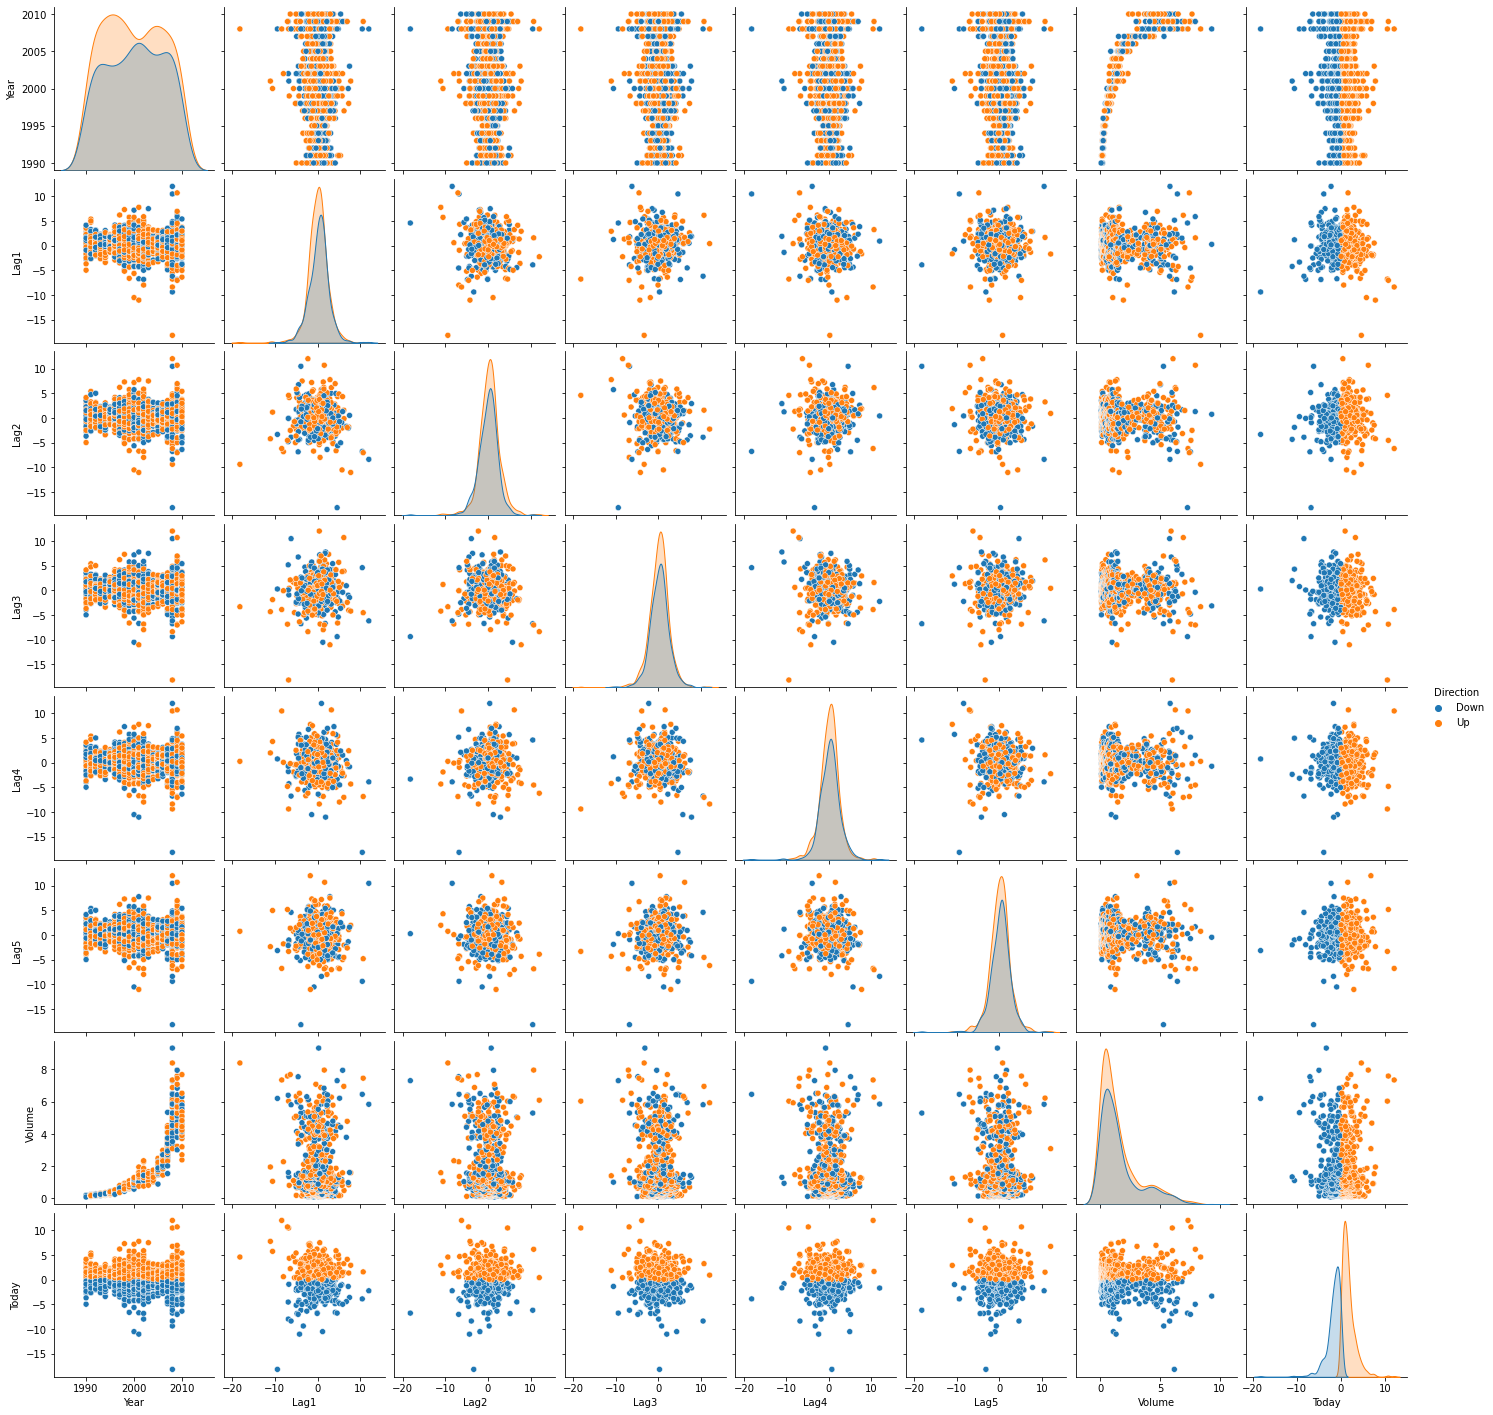

In [6]:
sb.pairplot(weeklydata, hue='Direction')

From the above pairplot the only discernable trend is that the volume of trades increases exponentially over the the years.

In [7]:
weeklydata.corr()

Year      Lag1      Lag2      Lag3      Lag4      Lag5    Volume  \
Year    1.000000 -0.032289 -0.033390 -0.030006 -0.031128 -0.030519  0.841942   
Lag1   -0.032289  1.000000 -0.074853  0.058636 -0.071274 -0.008183 -0.064951   
Lag2   -0.033390 -0.074853  1.000000 -0.075721  0.058382 -0.072499 -0.085513   
Lag3   -0.030006  0.058636 -0.075721  1.000000 -0.075396  0.060657 -0.069288   
Lag4   -0.031128 -0.071274  0.058382 -0.075396  1.000000 -0.075675 -0.061075   
Lag5   -0.030519 -0.008183 -0.072499  0.060657 -0.075675  1.000000 -0.058517   
Volume  0.841942 -0.064951 -0.085513 -0.069288 -0.061075 -0.058517  1.000000   
Today  -0.032460 -0.075032  0.059167 -0.071244 -0.007826  0.011013 -0.033078   

           Today  
Year   -0.032460  
Lag1   -0.075032  
Lag2    0.059167  
Lag3   -0.071244  
Lag4   -0.007826  
Lag5    0.011013  
Volume -0.033078  
Today   1.000000

<AxesSubplot:>

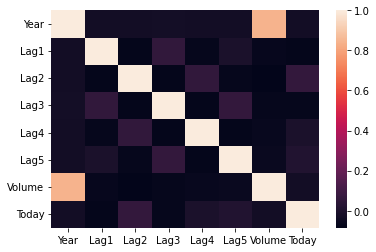

In [8]:
sb.heatmap(weeklydata.corr())

In [9]:
weeklydata["Direction"].value_counts()

Up      605
Down    484
Name: Direction, dtype: int64

It is interesting to see that our given data has more 'Up' closing dates than 'Down'. Maybe it is safe to conclude that over this time period the market is in a 'healthy' state; meaning the market is performing well. However, I would need to consult someone with more of a finacnial expertise to double check my assertation/assumption.


[Text(0.5, 0, 'Year'), Text(0, 0.5, 'Shares traded (in billions)')]

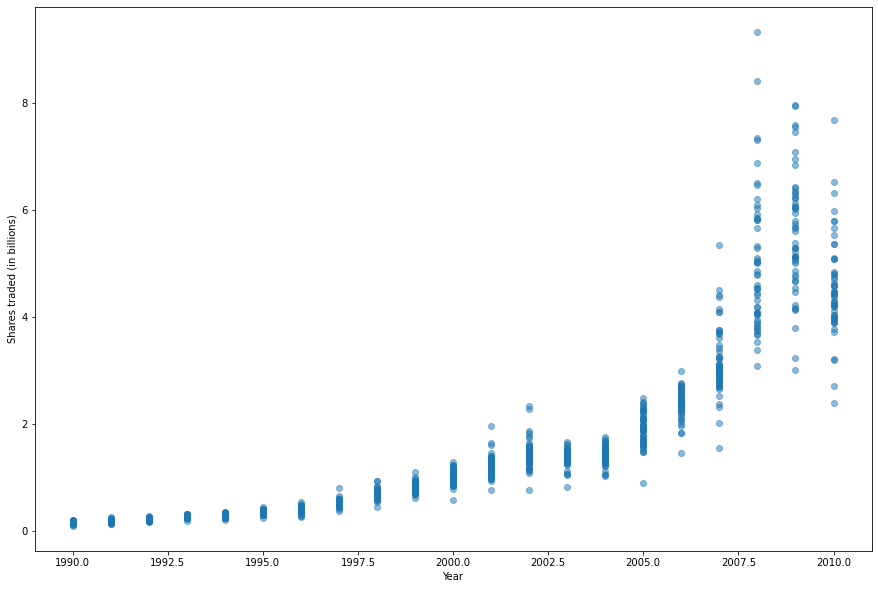

In [10]:
fig = plt.figure(figsize =(15,10))
ax = plt.axes()
ax.scatter(weeklydata.Year, weeklydata['Volume'], alpha=.5)
ax.set(xlabel = "Year", ylabel = "Shares traded (in billions)")


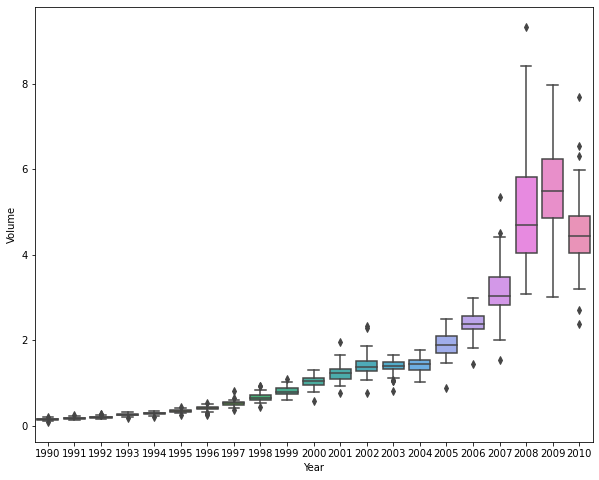

In [11]:
fig = plt.figure(figsize =(10,8))
ax = plt.axes()
ax = sb.boxplot(x="Year", y="Volume", data=weeklydata)

From this compartive set of boxplots a few things stick out to me. I find it interesting to see how over the years the IQR range and the overall variability in volume have inreased. Something else that I find interesting is loking at 91/92 years and seeing how the outliers tend to exist only above the 75th percentile.

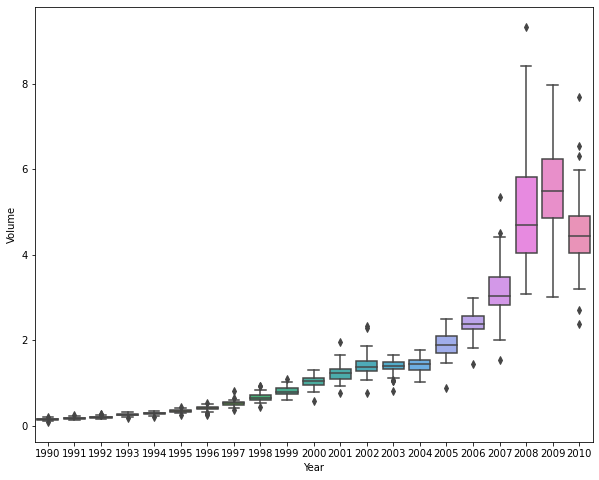

In [12]:
fig = plt.figure(figsize =(10,8))
ax = plt.axes()
ax = sb.boxplot(x=weeklydata.Year,y="Volume", data=weeklydata)

In [13]:
#def count_na(df):

weeklydata.isna().sum().sum()

0

our data from contains no NA values.


Now, let's run some classification models on our data. In order to do this we will need to change the Direction column to a numerical values that are easy to categorize.

In [14]:
convertDirectionToCat = {"Direction": {"Down":0,"Up":1}}
weeklydata.replace(convertDirectionToCat)

Year   Lag1   Lag2   Lag3   Lag4   Lag5    Volume  Today  Direction
0     1990  0.816  1.572 -3.936 -0.229 -3.484  0.154976 -0.270          0
1     1990 -0.270  0.816  1.572 -3.936 -0.229  0.148574 -2.576          0
2     1990 -2.576 -0.270  0.816  1.572 -3.936  0.159837  3.514          1
3     1990  3.514 -2.576 -0.270  0.816  1.572  0.161630  0.712          1
4     1990  0.712  3.514 -2.576 -0.270  0.816  0.153728  1.178          1
...    ...    ...    ...    ...    ...    ...       ...    ...        ...
1084  2010 -0.861  0.043 -2.173  3.599  0.015  3.205160  2.969          1
1085  2010  2.969 -0.861  0.043 -2.173  3.599  4.242568  1.281          1
1086  2010  1.281  2.969 -0.861  0.043 -2.173  4.835082  0.283          1
1087  2010  0.283  1.281  2.969 -0.861  0.043  4.454044  1.034          1
1088  2010  1.034  0.283  1.281  2.969 -0.861  2.707105  0.069          1

[1089 rows x 9 columns]

In [15]:
y = weeklydata.replace(convertDirectionToCat)['Direction']
y


0       0
1       0
2       1
3       1
4       1
       ..
1084    1
1085    1
1086    1
1087    1
1088    1
Name: Direction, Length: 1089, dtype: int64

In [16]:
X = sm.add_constant(weeklydata.drop(['Direction','Year','Today'], axis = 1))
X

/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const   Lag1   Lag2   Lag3   Lag4   Lag5    Volume
0       1.0  0.816  1.572 -3.936 -0.229 -3.484  0.154976
1       1.0 -0.270  0.816  1.572 -3.936 -0.229  0.148574
2       1.0 -2.576 -0.270  0.816  1.572 -3.936  0.159837
3       1.0  3.514 -2.576 -0.270  0.816  1.572  0.161630
4       1.0  0.712  3.514 -2.576 -0.270  0.816  0.153728
...     ...    ...    ...    ...    ...    ...       ...
1084    1.0 -0.861  0.043 -2.173  3.599  0.015  3.205160
1085    1.0  2.969 -0.861  0.043 -2.173  3.599  4.242568
1086    1.0  1.281  2.969 -0.861  0.043 -2.173  4.835082
1087    1.0  0.283  1.281  2.969 -0.861  0.043  4.454044
1088    1.0  1.034  0.283  1.281  2.969 -0.861  2.707105

[1089 rows x 7 columns]

In [17]:
logistic_reg= sm.Logit(y, X)
logistic_res = logistic_reg.fit()
print(logistic_res.summary())

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Sat, 09 Oct 2021   Pseudo R-squ.:                0.006580
Time:                        09:57:36   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.1313
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.

Based off of the logistic regression we see that there is only one p-value that can be deemed significat. 'Lag2' has an pvalue of .03 which, if we let alpha = .05, is significant. Hence, we can regject the null hypothesis in favor of the alternative hypothesis for Lag2. So the effect of Lag2 does signifcantly effect the response of the Direction of market close.

In [35]:
def summary_with_confusion_mat(regressionres):
    
    confusion_matrix = pd.DataFrame(regressionres.pred_table(), columns = ["Down", "Up"], index = ["Down", "Up"])
    fig, ax = plt.subplots()
    sb.heatmap(confusion_matrix, annot = True, cbar = False, ax = ax, fmt = "g", square = True, annot_kws = {"fontsize": "x-large"})
    ax.set(xlabel = "predicted label", ylabel = "true label");

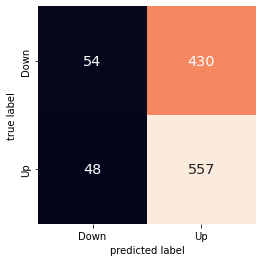

In [19]:
summary_with_confusion_mat(logistic_res)

In [20]:

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
#from sklearn.qda import QDA

train_criteria=(weeklydata["Year"]<2009)
test_criteria=(weeklydata["Year"]>=2009)


In [21]:
X_train = sm.add_constant(weeklydata.loc[train_criteria, "Lag2"])
X_test = sm.add_constant(weeklydata.loc[test_criteria, "Lag2"])


/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [22]:
y = weeklydata.replace(convertDirectionToCat)['Direction']
y_train=y[train_criteria]
y_test=y[test_criteria]
#y_t = (weeklydata.loc[train_criteria, "Direction"] == "Up").astype("int64")
#y_t == y_train
smallframe=[]
smallframe.append(y_train)
smallframe.append(y_test)
smallframe

[0      0
 1      0
 2      1
 3      1
 4      1
       ..
 980    0
 981    1
 982    1
 983    0
 984    1
 Name: Direction, Length: 985, dtype: int64,
 985     0
 986     0
 987     0
 988     0
 989     1
        ..
 1084    1
 1085    1
 1086    1
 1087    1
 1088    1
 Name: Direction, Length: 104, dtype: int64]

Now let's actually let's implement cross validation on a few models in order to find the one that performs best given our data. Additioanlly, I would like to repeat the same process with training/test data.

In [23]:
seed = 1

In [38]:
models =[]
models.append(('LR', LogisticRegression()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [77]:
#def cv_results_withKfold(splits):
seed = 7
results=[]
names=[]
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=100, random_state = seed,shuffle=True)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    #cv_results_train=model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    #cv_results_test=model_selection.cross_val_score(model, X_test, y_test, cv=kfold, scoring=scoring)
    results.append(cv_results)
    #results_train.append(cv_results_train)
    #results_test.append(cv_results_test)
    names.append(name)
    msg = "%s: %f (%f)" % (name,cv_results.mean(), cv_results.std())
    #csresults=(name, cv_results)
    print(msg)

LR: 0.548222 (0.162551)
LDA: 0.548222 (0.162551)


/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/

KNN: 0.489444 (0.162506)
CART: 0.484000 (0.155487)
NB: 0.551000 (0.169116)
SVM: 0.554889 (0.160937)


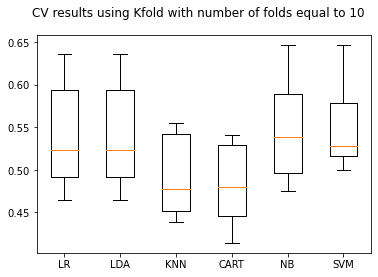

In [63]:
#cv_results_withKfold(10)

fig=plt.figure()
fig.suptitle('CV results using Kfold with number of folds equal to 10')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

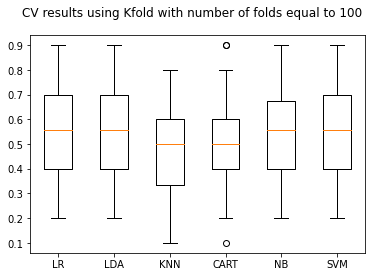

In [66]:
fig=plt.figure()
fig.suptitle('CV results using Kfold with number of folds equal to 100')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

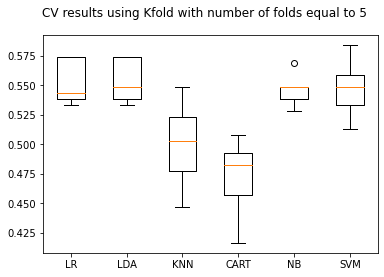

In [68]:
fig=plt.figure()
fig.suptitle('CV results using Kfold with number of folds equal to 5')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Based off of our cross validation results, using kfolds of 10, 100, and 5 respectively, there are a lot of takeways that seem significant. Of all the models from the various kfolds(5,10,100) it is clear that LR, LDA, and SVM learning methods perform the best. For the scenerios where kfold=5,10 it is hard to discern which method is best, and further analysis is needed. When kfold=100, I believe it is safe to say that SVM learning performs theb best given a mean of 0.554889 and standard devaition of 0.160937 for the Kfolds. 

It is interesting to note how Naive Bayes classifier tends to perform better as kfolds increase, as does SVM. One convern I have is data leakage occuring since My data isn't being split into training and test data within my CV loop.

In [80]:
#fit logistic reg. model
logr=LogisticRegression()
logr_fit=logr.fit(X_train,y_train)
y_pred_logr=logr.predict(X_test)
#score_logr = logr.score(X_test,y_test)
#score_logr


svm=SVC()
svm_fit=svm.fit(X_train,y_train)
y_pred_svm=svm.predict(X_test)


In [85]:
#model evalution using Confusion Matriz
from sklearn import metrics

confusion_matrix= metrics.confusion_matrix(y_test,y_pred_logr)
confusion_matrix

array([[ 9, 34],
       [ 5, 56]])

Text(0.5, 257.44, 'Predicted')

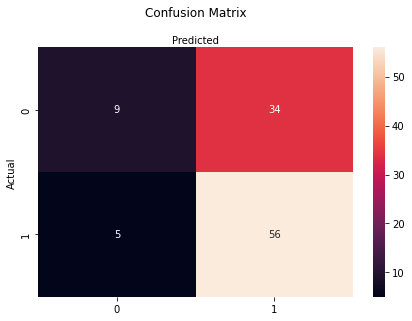

In [86]:
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
#create heat map
sb.heatmap(pd.DataFrame(confusion_matrix), annot=True,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [87]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_logr))
print("Precision:",metrics.precision_score(y_test, y_pred_logr))
print("Recall:",metrics.recall_score(y_test, y_pred_logr))

Accuracy: 0.625
Precision: 0.6222222222222222
Recall: 0.9180327868852459


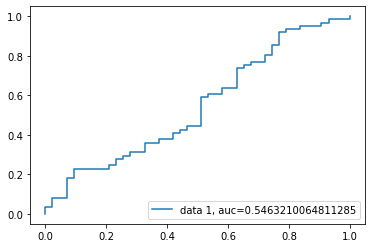

In [88]:
y_pred_proba = logr.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [84]:
confusion_matrix_svm= metrics.confusion_matrix(y_test,y_pred_svm)
confusion_matrix_svm

array([[ 8, 35],
       [ 4, 57]])

Text(0.5, 257.44, 'Predicted')

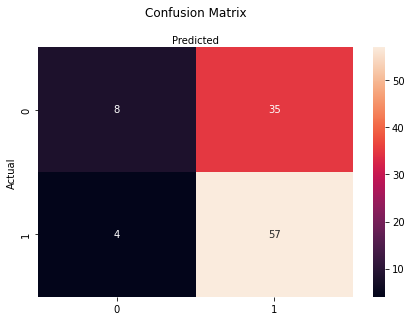

In [89]:
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
#create heat map
sb.heatmap(pd.DataFrame(confusion_matrix_svm), annot=True,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [90]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_svm))
print("Precision:",metrics.precision_score(y_test, y_pred_svm))
print("Recall:",metrics.recall_score(y_test, y_pred_svm))

Accuracy: 0.625
Precision: 0.6195652173913043
Recall: 0.9344262295081968
